# Houses and Empty Lots for Sale in New Brunswick (as of June 12, 2020)

In this project, I scraped data from this [website](https://www.point2homes.com/CA/Real-Estate-Listings/NB.html) which lists houses and 
empty lots for sale. The selling price is listed along with the lot size. For houses, the number of bedrooms, bathrooms, the house size the house type are also given.

## 3. Data Cleaning (Null Values, Reducing Variability)


In [1]:
# load libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
from tqdm.notebook import tqdm

train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')

# look at first 5 rows of training set
train.head(5)

,Address,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Postal Code,Price
0,"11 Coronation Court, Oromocto, New Brunswick, ...",4.0,2.0,NaN,NaN,Family,E2V2M9,169900
1,"5185 Route 127, St. Andrews, New Brunswick",4.0,2.0,1675.0,1.170,Residential,E5B3A7,259000
2,"Lot du Portage, Caraquet, New Brunswick, E1W1A8",NaN,NaN,NaN,NaN,Empty Land,E1W1A8,19000
3,"175 Ledden Street, Miramichi, New Brunswick, E...",4.0,2.0,1780.0,0.134,Residential,E1V 2G8,104200
4,"96 Todds Point Road, Saint Stephen, New Brunswick",4.0,3.0,NaN,NaN,Residential,E3L3P9,269000


In [2]:
# and the first five rows of the test set
val.head(5)

,Address,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Postal Code,Price
0,"Woodlot on Route 118, Miramichi, New Brunswick",NaN,NaN,NaN,NaN,Empty Land,NaN,39900
1,"Ghost Rd, Saint Andrews, New Brunswick",NaN,NaN,NaN,10.00,Residential,E5B2T2,70000
2,"Lot 89-1 Route 445, Fair Isle, New Brunswick",NaN,NaN,NaN,1.03,Empty Land,E9G2M7,8000
3,"Lot 76-2 Renaud, Saint - Antoine, New Brunswick",NaN,NaN,NaN,NaN,Empty Land,E4V3H3,24900
4,"582 Bonita Avenue, Silver Falls, New Brunswick",3.0,1.0,1725.0,NaN,Family,E2G2T3,119900


In [3]:
# get unique postal codes
print('Unique training postal codes: ',len(train['Postal Code'].unique()))
print('Unique validation postal codes: ',len(val['Postal Code'].unique()))

Unique training postal codes:  490
Unique validation postal codes:  92


There are a lot of postal codes. To reduce the variability of postal codes, we just get the first half of the postal code.

In [4]:
train['Postal'] = train['Postal Code'].str[:3]
train.head(5)

,Address,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Postal Code,Price,Postal
0,"11 Coronation Court, Oromocto, New Brunswick, ...",4.0,2.0,NaN,NaN,Family,E2V2M9,169900,E2V
1,"5185 Route 127, St. Andrews, New Brunswick",4.0,2.0,1675.0,1.170,Residential,E5B3A7,259000,E5B
2,"Lot du Portage, Caraquet, New Brunswick, E1W1A8",NaN,NaN,NaN,NaN,Empty Land,E1W1A8,19000,E1W
3,"175 Ledden Street, Miramichi, New Brunswick, E...",4.0,2.0,1780.0,0.134,Residential,E1V 2G8,104200,E1V
4,"96 Todds Point Road, Saint Stephen, New Brunswick",4.0,3.0,NaN,NaN,Residential,E3L3P9,269000,E3L


In [5]:
# do same thing for validation set
val['Postal'] = val['Postal Code'].str[:3]

In [6]:
# get number of unique 'Postal' values for both sets
print('Unique training postal values: ',len(train['Postal'].unique()))
print('Unique validation postal values: ',len(val['Postal'].unique()))

Unique training postal values:  92
Unique validation postal values:  52


Those numbers are not bad. Now we check the histogram of **Postal**.

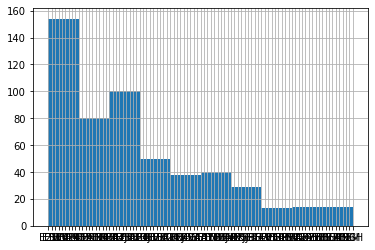

In [7]:
train.Postal.hist()

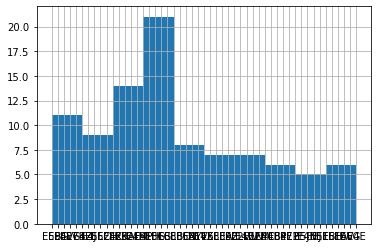

In [8]:
val.Postal.hist()

In [9]:
# get counts for postal
train.Postal.value_counts()

E3L    60
E1A    34
E5B    29
E3A    25
E4P    24
       ..
E9B     1
E7J     1
E7P     1
E6B     1
E2J     1
Name: Postal, Length: 91, dtype: int64

Okay, so there are plenty of postal codes with only ones in them. So we just pick the first two characters of the postal code instead.

In [10]:
train['Postal'] = train['Postal'].str[:-1]
train.Postal.value_counts()

E3    123
E1    112
E4    109
E5     78
E2     58
E7     16
E6     15
E9     14
E8      7
Name: Postal, dtype: int64

In [11]:
# do the same thing for the validation set
val['Postal'] = val['Postal'].str[:-1]
val.Postal.value_counts()

E4    25
E3    20
E1    13
E5    13
E2    11
E9     6
E6     2
E8     2
E7     2
Name: Postal, dtype: int64

Much better. We can now drop the postal code.

In [12]:
train.drop('Postal Code',axis=1,inplace=True)
val.drop('Postal Code', axis=1, inplace=True)

In [13]:
# there is a null value. let's check the address(es)
train[train.Postal.isnull()]

,Address,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal
71,"2100 Bridletowne Cir, Clarks Corners, New Brun...",3.0,2.0,1390.0,NaN,Residential,820000,NaN
94,"20 Burlington Court, Pokiok, New Brunswick",NaN,NaN,NaN,NaN,Empty Land,124000,NaN
207,"642 Charters Settlement Road, Greater New Mary...",4.0,1.0,NaN,NaN,Family,224900,NaN
279,"71 Pointe des Robichaud, Val - Comeau, New Bru...",3.0,1.0,NaN,NaN,Family,319000,NaN
357,"Lot Route 390, Greater Perth - Andover, New Br...",NaN,NaN,NaN,NaN,Empty Land,80000,NaN


According to Wikipedia and some searching in Google, Greater Perth-Andover has postal codes starting with E7. As for Val-Comeau, it starts with E1. For Pokiok, its E6 and for Clarks Corner its E4. Greater New Maryland has a postal code starting with E3.

In [14]:
nan_postal = {71 : 'E4', 94: 'E6', 207: 'E3', 279: 'E1', 357: 'E7'}

for index, post in nan_postal.items():
    train.loc[index,'Postal'] = post

train.loc[nan_postal.keys(),:]

,Address,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal
71,"2100 Bridletowne Cir, Clarks Corners, New Brun...",3.0,2.0,1390.0,NaN,Residential,820000,E4
94,"20 Burlington Court, Pokiok, New Brunswick",NaN,NaN,NaN,NaN,Empty Land,124000,E6
207,"642 Charters Settlement Road, Greater New Mary...",4.0,1.0,NaN,NaN,Family,224900,E3
279,"71 Pointe des Robichaud, Val - Comeau, New Bru...",3.0,1.0,NaN,NaN,Family,319000,E1
357,"Lot Route 390, Greater Perth - Andover, New Br...",NaN,NaN,NaN,NaN,Empty Land,80000,E7


In [15]:
# check null postal for test set
val[val.Postal.isnull()]

,Address,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal
0,"Woodlot on Route 118, Miramichi, New Brunswick",NaN,NaN,NaN,NaN,Empty Land,39900,NaN


Miramichi has a postal code starting with E1.

In [16]:
val['Postal'] = 'E1'

# check if there are no more null values
val[val.Postal.isnull()]

,Address,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal


We can also drop the addresses now since we have the postal codes. 

In [17]:
train.drop('Address',axis=1,inplace=True)
val.drop('Address',axis=1,inplace=True)

## 3.1 Imputations

### 3.1.1 Beds and Baths
We first check the distribution of beds and baths for both sets. First, the training set.

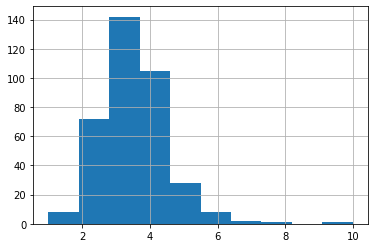

In [18]:
train['Beds'].hist()

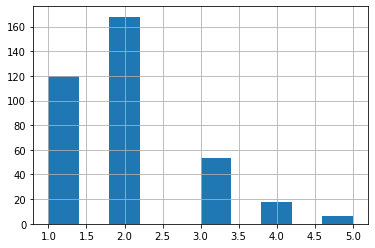

In [19]:
train['Baths'].hist()

Now we check how many null values there are for beds and baths.

In [20]:
print('Null values for Beds on train: ', train.Beds.isnull().sum())
print('Null values for Baths on train: ',train.Baths.isnull().sum())
print('Rows in train: ',len(train))

Null values for Beds on train:  170
Null values for Baths on train:  172
Rows in train:  537


Obviously, if its an empty land there would be no beds or baths, so lets check if they are null or zeroes for empty land.

In [21]:
train[train['Type']=='Empty Land'].Beds.isnull()

2      True
13     True
18     True
33     True
38     True
       ... 
527    True
529    True
530    True
532    True
536    True
Name: Beds, Length: 134, dtype: bool

So they are padded with null values, and not zeroes. About 32% of the training data have no beds or baths values. This seems problematic. Although, we could possibly have more predicting power if we just impute the nulls with the medians, since the distributions for beds and baths are right-skewed. As for empty land, we just replace them with zeroes.

In [22]:
train.loc[train['Type'] == 'Empty Land','Beds']

2     NaN
13    NaN
18    NaN
33    NaN
38    NaN
       ..
527   NaN
529   NaN
530   NaN
532   NaN
536   NaN
Name: Beds, Length: 134, dtype: float64

In [23]:
bed_median = train['Beds'].median(skipna=True)
bath_median = train['Baths'].median(skipna=True)

# no beds nor baths for empty land
for index, typ in tqdm(train['Type'].items(),total=len(train['Type'])):
    if np.isnan(train.loc[index,'Beds']):
        if typ == 'Empty Land':
            train.loc[index,'Beds'] = 0
        else:
            train.loc[index,'Beds'] = bed_median
            
    if np.isnan(train.loc[index,'Baths']):
        if typ == 'Empty Land':
            train.loc[index,'Baths'] = 0
        else:
            train.loc[index,'Baths'] = bath_median
        
train.head(5)

,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal
0,4.0,2.0,NaN,NaN,Family,169900,E2
1,4.0,2.0,1675.0,1.170,Residential,259000,E5
2,0.0,0.0,NaN,NaN,Empty Land,19000,E1
3,4.0,2.0,1780.0,0.134,Residential,104200,E1
4,4.0,3.0,NaN,NaN,Residential,269000,E3


In [24]:
# check whether the imputation was successful
train.Beds.isnull().sum()

0

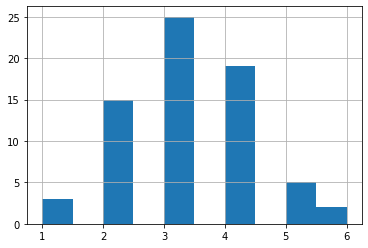

In [25]:
# do the same thing for the validation set
val['Beds'].hist()

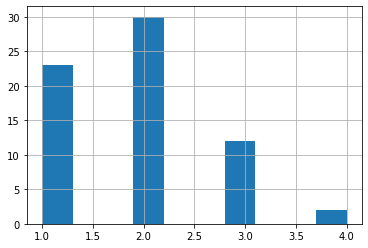

In [26]:
val['Baths'].hist()

In [27]:
# check how many null values for beds and baths are there
print('Null values for Beds on val: ', val.Beds.isnull().sum())
print('Null values for Baths on val: ',val.Baths.isnull().sum())
print('Rows in train: ',len(val))

Null values for Beds on val:  26
Null values for Baths on val:  28
Rows in train:  95


Roughly 28% is missing, so not bad. For beds, it seems like the distribution is symmetric, so we can just impute with the mean, but for baths, the distribution is right-skewed, so we impute with the median (for residential types), zero for empty land.

In [28]:
bed_median = val['Beds'].median(skipna=True)
bath_median = val['Baths'].median(skipna=True)

# no beds nor baths for empty land
for index, typ in tqdm(val['Type'].items(),total=len(val['Type'])):
    if np.isnan(val.loc[index,'Beds']):
        if typ == 'Empty Land':
            val.loc[index,'Beds'] = 0
        else:
            val.loc[index,'Beds'] = bed_median
            
    if np.isnan(val.loc[index,'Baths']):
        if typ == 'Empty Land':
            val.loc[index,'Baths'] = 0
        else:
            val.loc[index,'Baths'] = bath_median

In [29]:
# check whether imputation was successful
val.Beds.isnull().sum()

0

### 3.1.2 House Size

Empty lands with null values (for house size) on them should be replaced with zero. Now as for residential types, we look at their distributions. First the training set.

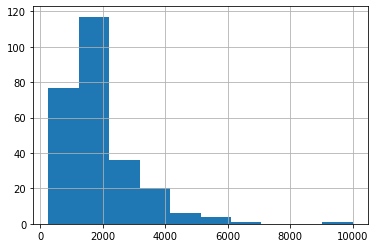

In [30]:
train['House Size (sqft)'].hist()

Its skewed to the right, so we impute once again with the median.

In [31]:
house_median = train['House Size (sqft)'].median(skipna=True)

# no house size for empty land
for index, typ in tqdm(train['Type'].items(),total=len(train['Type'])):
    if np.isnan(train.loc[index,'House Size (sqft)']):
        if typ == 'Empty Land':
            train.loc[index,'House Size (sqft)'] = 0
        else:
            train.loc[index,'House Size (sqft)'] = house_median

train.head(5)

,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal
0,4.0,2.0,1584.0,NaN,Family,169900,E2
1,4.0,2.0,1675.0,1.170,Residential,259000,E5
2,0.0,0.0,0.0,NaN,Empty Land,19000,E1
3,4.0,2.0,1780.0,0.134,Residential,104200,E1
4,4.0,3.0,1584.0,NaN,Residential,269000,E3


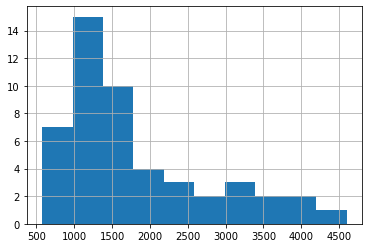

In [32]:
# lets now check the validation set
val['House Size (sqft)'].hist()

We see the same behaviour on the distribution, so we employ the same strategy.

In [33]:
house_median = val['House Size (sqft)'].median(skipna=True)

# no house size for empty land
for index, typ in tqdm(val['Type'].items(),total=len(val['Type'])):
    if np.isnan(val.loc[index,'House Size (sqft)']):
        if typ == 'Empty Land':
            val.loc[index,'House Size (sqft)'] = 0
        else:
            val.loc[index,'House Size (sqft)'] = house_median

val.head(5)

,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal
0,0.0,0.0,0.0,NaN,Empty Land,39900,E1
1,3.0,2.0,1519.0,10.00,Residential,70000,E1
2,0.0,0.0,0.0,1.03,Empty Land,8000,E1
3,0.0,0.0,0.0,NaN,Empty Land,24900,E1
4,3.0,1.0,1725.0,NaN,Family,119900,E1


### 3.1.4 Lot Size

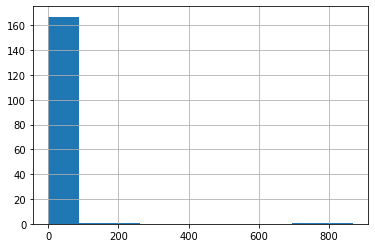

In [34]:
train['Lot Size (ac)'].hist()

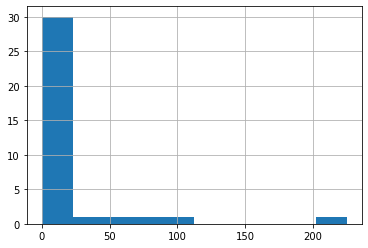

In [35]:
val['Lot Size (ac)'].hist()

For lot size, the distributions are right-skewed. However, it might be better to distinguish between thouse with houses (residential and family) and empty land.

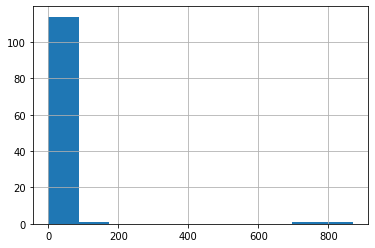

In [36]:
train.loc[train['Type']!='Empty Land','Lot Size (ac)'].hist()

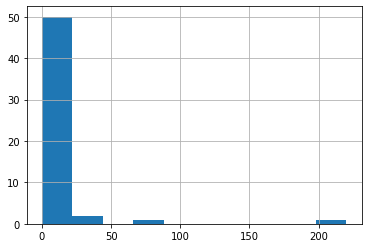

In [37]:
train.loc[train['Type']=='Empty Land','Lot Size (ac)'].hist()

It's pretty much the same behaviour. Now we check the null values.

In [38]:
# number of nulls on train
print('nonempty land: ',train.loc[train['Type']!='Empty Land','Lot Size (ac)'].isnull().sum())
print('empty land: ',train.loc[train['Type']=='Empty Land','Lot Size (ac)'].isnull().sum())


nonempty land:  286
empty land:  80


In [39]:
# check the medians
print('median nonempty land: ',train.loc[train['Type']=='Residential','Lot Size (ac)'].median(skipna=True))
print('median empty land: ',train.loc[train['Type']=='Empty Land','Lot Size (ac)'].median(skipna=True))

median nonempty land:  1.0
median empty land:  2.2199999999999998


In [40]:
# Okay, so we'll just impute with the medians for each type
lot_nonempty = train.loc[train['Type']!='Empty Land','Lot Size (ac)'].median(skipna=True)
lot_empty = train.loc[train['Type']=='Empty Land','Lot Size (ac)'].median(skipna=True)

for index, typ in tqdm(train['Type'].items(),total=len(train['Type'])):
    if np.isnan(train.loc[index,'Lot Size (ac)']):
        if typ == 'Empty Land':
            train.loc[index,'Lot Size (ac)'] = lot_empty
        else:
            train.loc[index,'Lot Size (ac)'] = lot_nonempty

train.head(5)

,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal
0,4.0,2.0,1584.0,0.724,Family,169900,E2
1,4.0,2.0,1675.0,1.170,Residential,259000,E5
2,0.0,0.0,0.0,2.220,Empty Land,19000,E1
3,4.0,2.0,1780.0,0.134,Residential,104200,E1
4,4.0,3.0,1584.0,0.724,Residential,269000,E3


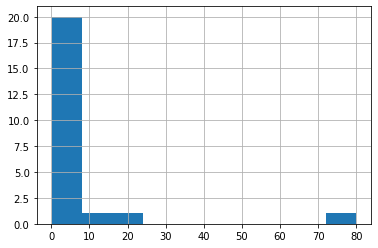

In [41]:
# Now, the validation set
val.loc[val['Type']!='Empty Land','Lot Size (ac)'].hist()

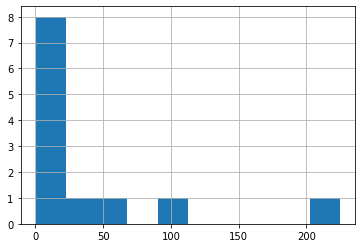

In [42]:
val.loc[val['Type']=='Empty Land','Lot Size (ac)'].hist()

In [43]:
# since the distributions are right-skewed, we just impute with the medians once again
# Okay, so we'll just impute with the medians for each type
# Okay, so we'll just impute with the medians for each type
lot_nonempty = val.loc[train['Type']!='Empty Land','Lot Size (ac)'].median(skipna=True)
lot_empty = val.loc[train['Type']=='Empty Land','Lot Size (ac)'].median(skipna=True)

for index, typ in tqdm(val['Type'].items(),total=len(val['Type'])):
    if np.isnan(val.loc[index,'Lot Size (ac)']):
        if typ == 'Empty Land':
            val.loc[index,'Lot Size (ac)'] = lot_empty
        else:
            val.loc[index,'Lot Size (ac)'] = lot_nonempty

val.head(5)

,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal
0,0.0,0.0,0.0,1.30,Empty Land,39900,E1
1,3.0,2.0,1519.0,10.00,Residential,70000,E1
2,0.0,0.0,0.0,1.03,Empty Land,8000,E1
3,0.0,0.0,0.0,1.30,Empty Land,24900,E1
4,3.0,1.0,1725.0,1.00,Family,119900,E1


In [44]:
# save cleaned datasets
train.to_csv('train_cleaned.csv',index=False)
val.to_csv('val_cleaned.csv',index=False)